In [10]:
%load_ext autoreload
%autoreload
from trace_utils import *
from imgproc_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# replace with a configuration file
work_dir = '/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test'
channel_dict = {'DAPI': 0, 'TL':1, 'gt':2, 'pho':3, 'kr':4}
# bkgd_signal = 200
channel_list = ['DAPI', 'gt', 'pho', 'kr'] #keep for iteration
data_channel_list = ['gt', 'pho', 'kr']
shape_channel = 'DAPI'
ap_channel = 'DAPI'
dv_channel = 'hb'


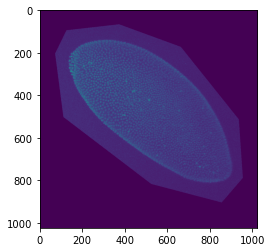

In [3]:
filename = 'pho_20210929_BCDKr_10.czi'

path = os.path.join(work_dir, filename)
czi = czifile.imread(path)
img=czi.squeeze()
data = {}
for channel in channel_list:
    data[channel] = img[channel_dict[channel],...]
    
xdim = img.shape[2]
ydim = img.shape[3]
z_plane = img.shape[1]/2
z_plane = round(z_plane)

max_AP = data[ap_channel].max(0) # this will be how to pick AP axis
# zshape = data[shape_channel][z_plane,:,:]
zshape = data[shape_channel].max(0)
threshed = []
#zshape = exposure.adjust_gamma(zshape)
plt.imshow(zshape)


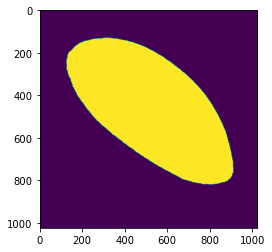

In [27]:
threshed.append(get_thresholded(data, 'jefe_2'))
plt.imshow(threshed[-1])

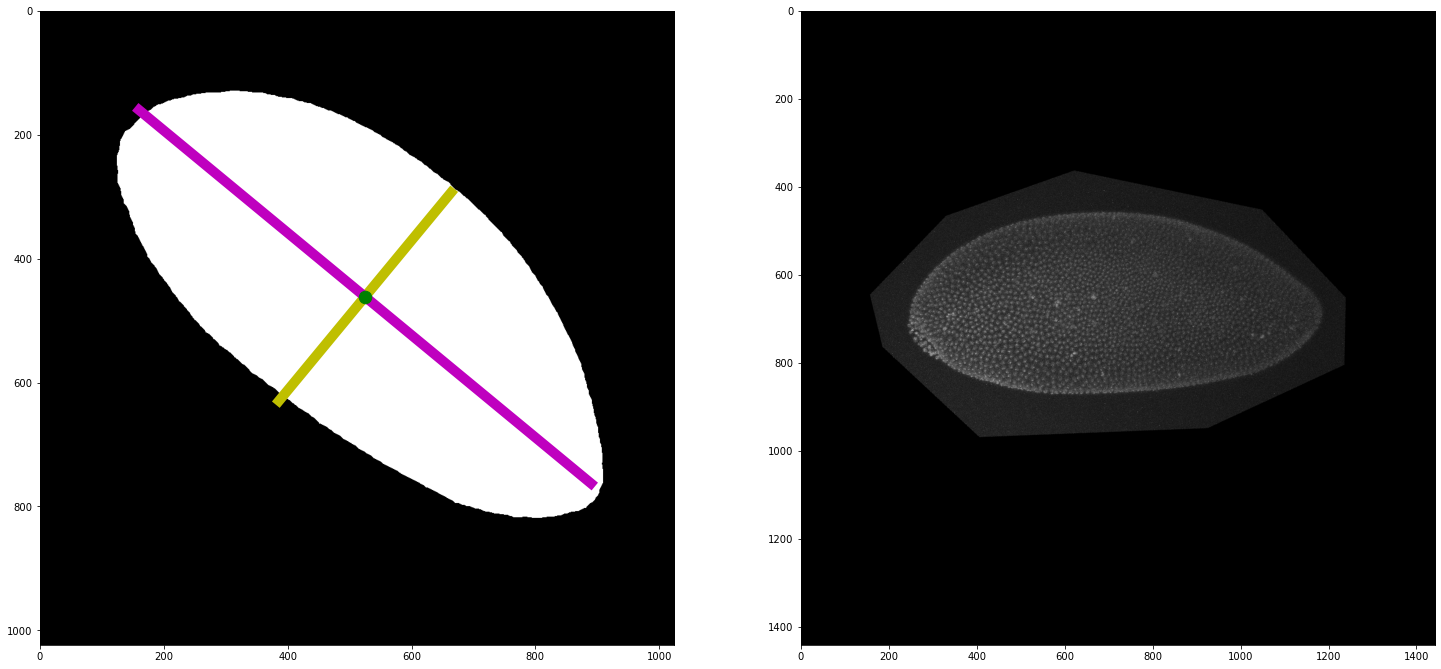

In [29]:
zshape, rotation_axis, rotated_AP, xs, ys = get_orientation(data, method='jefe_2')
fig = show_orientation(zshape, rotated_AP, xs, ys)

In [14]:
#get data to load
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.czi']
file_list

['wt_20210510_gthb_5.czi',
 'wt_20210920_BCDKr_1.czi',
 'wt_20210920_BCDKr_3.czi',
 'sfmbt_20210926_5.czi',
 'pho_gthb_20210427_2.czi',
 'pho_gthb_20210427_1.czi']

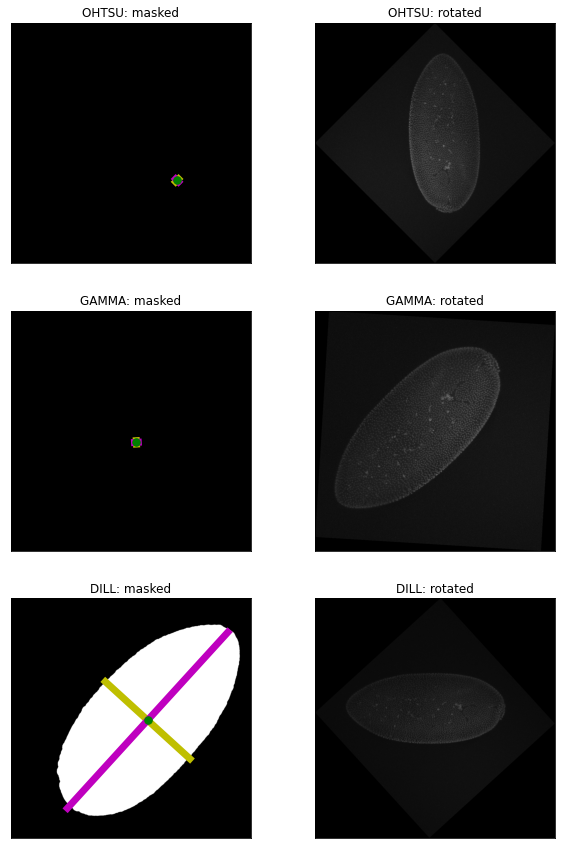

In [10]:
fig = show_thresh_test(data)

In [31]:
%autoreload
from trace_utils import *

/Users/robinhood/repos/mordor/trace_utils.py:88: RuntimeWarning: invalid value encountered in true_divide
  standard_trace, _, _ = stats.binned_statistic(inds, trace, bins=length)


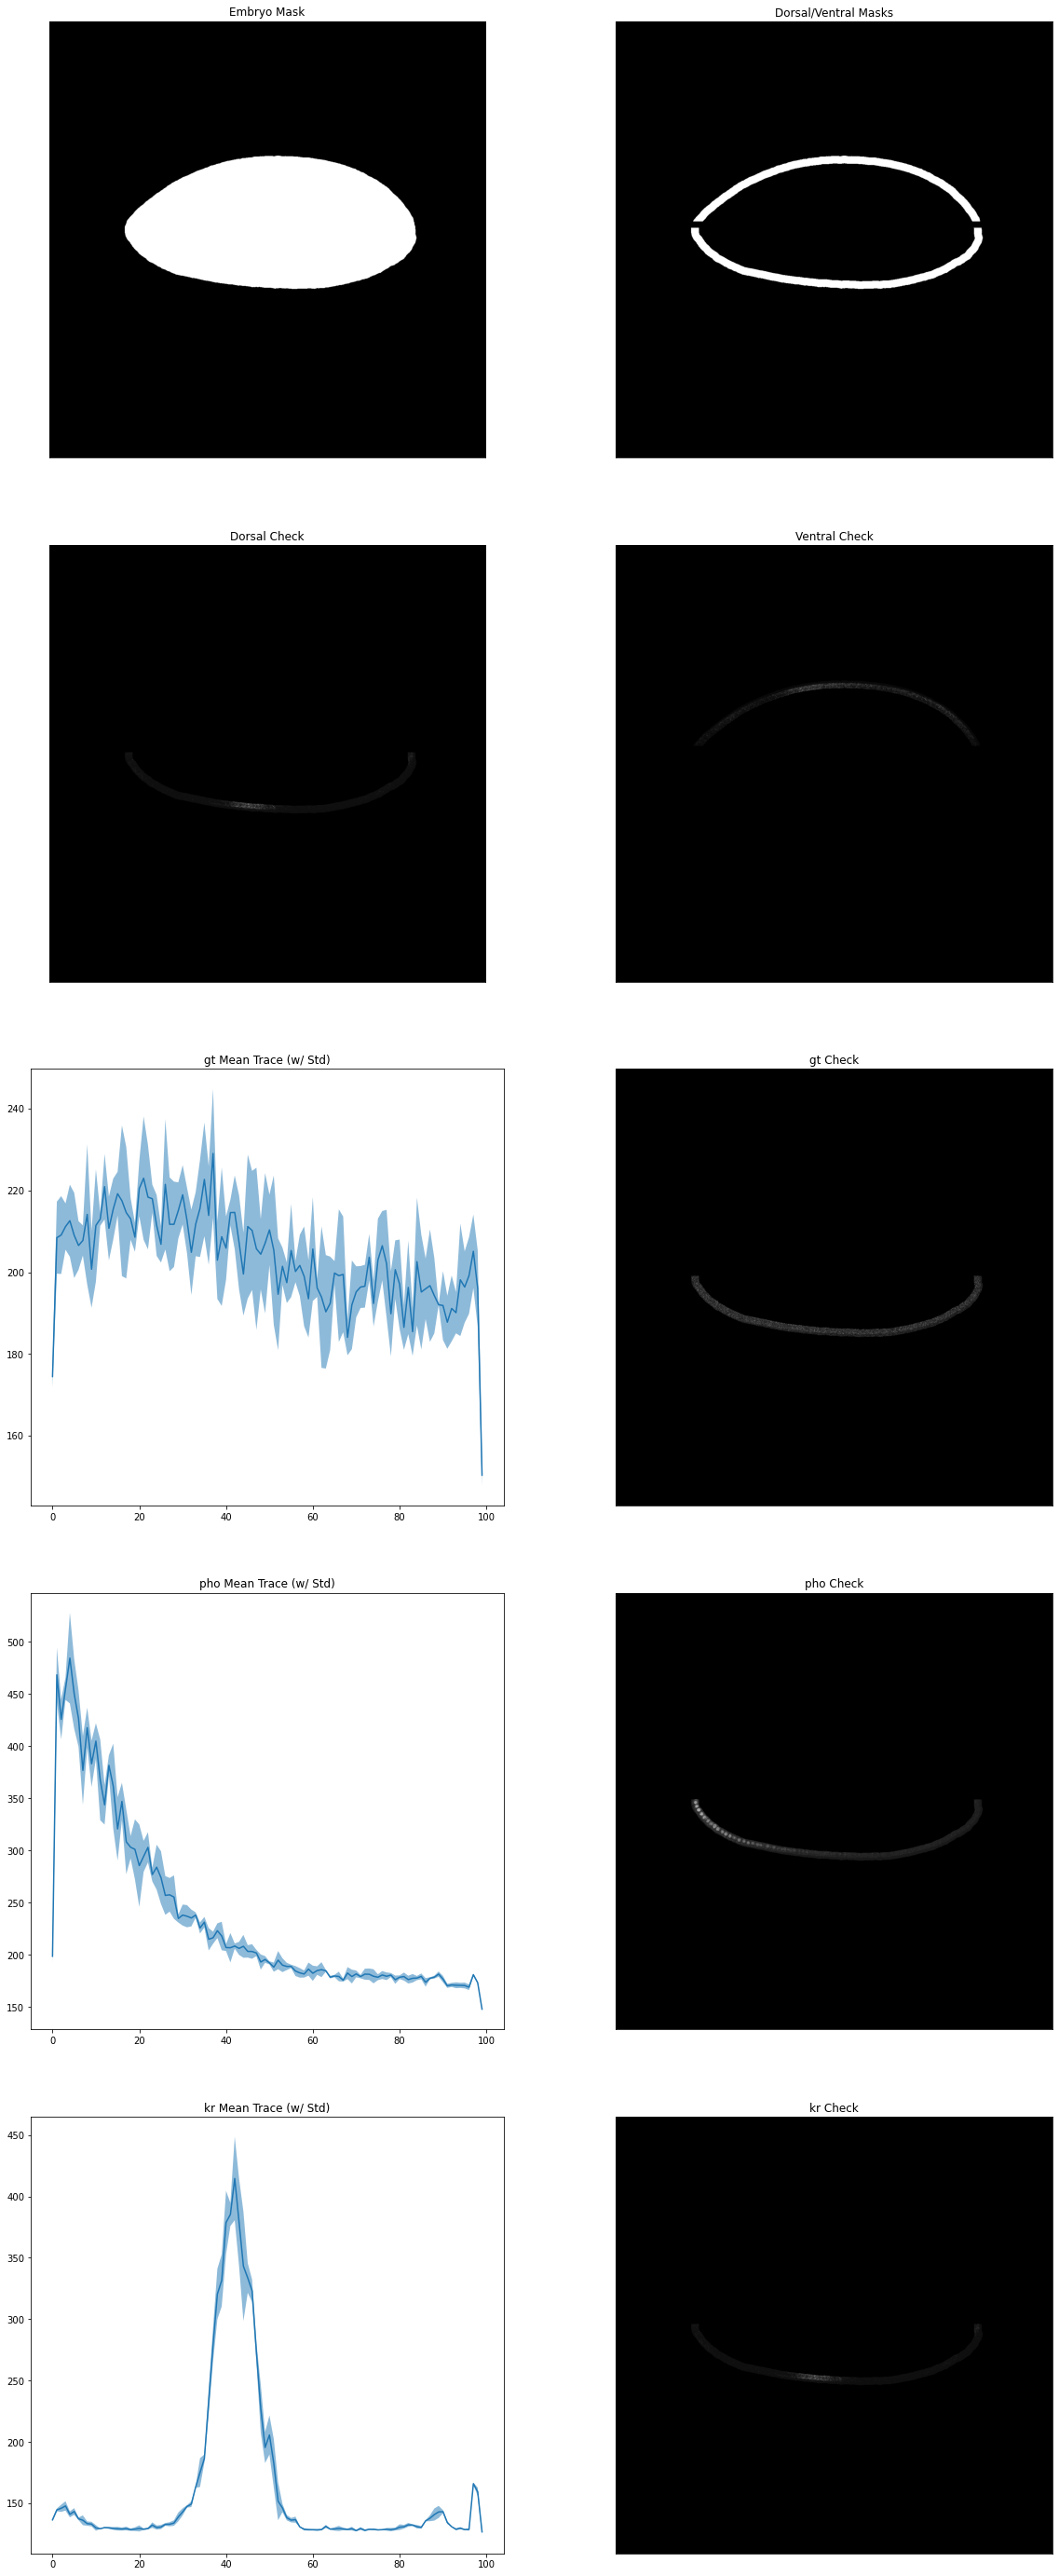

In [32]:
traces, qc_imgs = get_traces(data, True, data_channel_list, method='jefe_2', dv_channel='kr')
make_qc_figs(qc_imgs, traces)


In [33]:
csv_name = '/Users/robinhood/Downloads/threshAP_all - gt_hb.csv'
database = load_csv_database(csv_name)
database

{'pho_20210427_gthb_10': {'filename': 'pho_20210427_gthb_10',
  'genotype': 'pho',
  'quality': 'good',
  'thresh_method': 'JEFE_3',
  'flip': 'TRUE'},
 'pho_20210427_gthb_11': {'filename': 'pho_20210427_gthb_11',
  'genotype': 'pho',
  'quality': 'good',
  'thresh_method': 'OHTSU',
  'flip': 'TRUE'},
 'pho_20210427_gthb_12': {'filename': 'pho_20210427_gthb_12',
  'genotype': 'pho',
  'quality': 'bad',
  'thresh_method': '',
  'flip': ''},
 'pho_20210427_gthb_13': {'filename': 'pho_20210427_gthb_13',
  'genotype': 'pho',
  'quality': 'good',
  'thresh_method': 'OHTSU',
  'flip': 'FALSE'},
 'pho_20210427_gthb_14': {'filename': 'pho_20210427_gthb_14',
  'genotype': 'pho',
  'quality': 'bad',
  'thresh_method': '',
  'flip': ''},
 'pho_20210427_gthb_15': {'filename': 'pho_20210427_gthb_15',
  'genotype': 'pho',
  'quality': 'good',
  'thresh_method': 'OHTSU',
  'flip': 'TRUE'},
 'pho_20210427_gthb_16': {'filename': 'pho_20210427_gthb_16',
  'genotype': 'pho',
  'quality': 'good',
  'thres

In [34]:
for filename, info in database.items(): #for each file in the database
    path = os.path.join(work_dir, filename) + '.czi'
    print(path)


/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_10.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_11.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_12.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_13.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_14.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_15.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_16.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_17.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_18.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_19.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20210427_gthb_1.czi
/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test/pho_20